In [158]:
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
import numpy as np 

In [159]:
data = pd.read_csv("Data\Rhodium.csv")

In [160]:
lambda_=data["Wavelength (pm)"].tolist()
intensidad= data["Intensity (mJy)"].tolist()

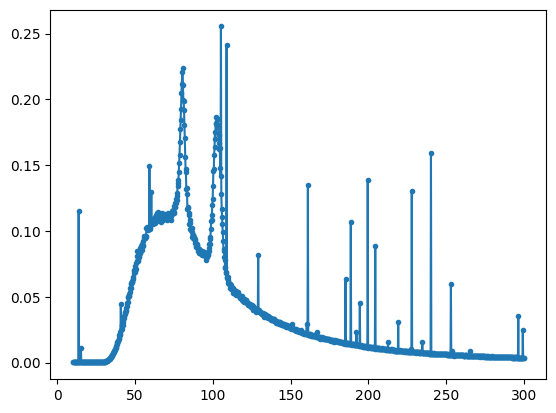

In [161]:
plt.plot(lambda_,intensidad,".-")

In [162]:
def filtrar(x,y,tolerancia=0.0060):
    x_nuevo= []
    y_nuevo= []
    n= len(x)
    for i in range (0,n-1):
        dato_estudio=y[i]
        dato_posterior=y[i+1]
        resta= abs(dato_estudio-dato_posterior)
        if resta < tolerancia:
            x_nuevo.append(x[i])
            y_nuevo.append(y[i])
    return x_nuevo,y_nuevo

In [163]:
lambda_filtro,intensidad_filtro= filtrar(lambda_,intensidad)

In [164]:
datos_elimininados= len(intensidad)-len(intensidad_filtro)
print(f"Datos eliminados: {datos_elimininados}")

Datos eliminados: 93


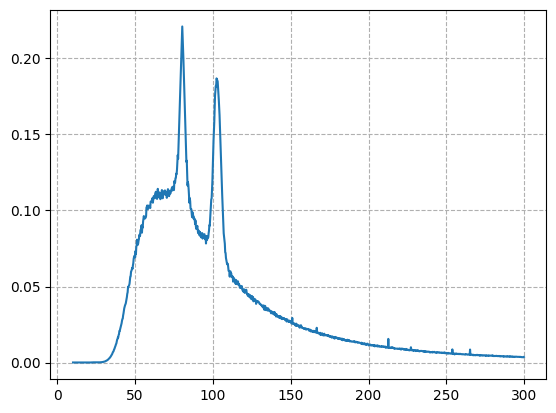

In [165]:
plt.plot(lambda_filtro,intensidad_filtro)
plt.grid(linestyle="--")


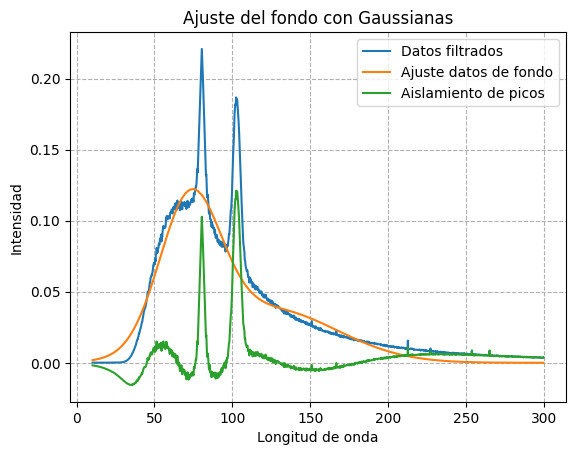

In [166]:
#Punto 1b 
def gaussianas(x, A1, mu1, sigma1,A2,mu2,sigma2):
    gauss1 = A1 * np.exp(-((x - mu1)**2) / (2 * sigma1**2))
    gauss1 = gauss1/ ((2*np.pi)**(1/2)*sigma1)
    gauss2 = A2 * np.exp(-((x - mu2)**2) / (2 * sigma2**2))
    gauss2 = gauss2 / ((2*np.pi)**(1/2)*sigma2)
    return gauss1+ gauss2

lambda_filtro=np.array(lambda_filtro)
intensidad_filtro = np.array(intensidad_filtro)

corte_picos = (
    (lambda_filtro< 75) |  
    ((lambda_filtro > 90) & (lambda_filtro < 95)) |  
    (lambda_filtro > 105) 
)

lambda_fondo= lambda_filtro[corte_picos]
intensidad_fondo= intensidad_filtro[corte_picos]

p0 = [0.1, 20, 20,0.04,200,55]
parametros, _ = curve_fit(gaussianas, lambda_fondo, intensidad_fondo, p0=p0)
ajuste_fondo= gaussianas(lambda_filtro, *parametros)
intensidad_sin_fondo= intensidad_filtro-ajuste_fondo

plt.plot(lambda_filtro,intensidad_filtro,label="Datos filtrados")
plt.plot(lambda_filtro,ajuste_fondo,label="Ajuste datos de fondo")
plt.plot(lambda_filtro,intensidad_sin_fondo,label="Aislamiento de picos")
plt.xlabel("Longitud de onda")
plt.ylabel("Intensidad")
plt.title("Ajuste del fondo con Gaussianas")
plt.grid(linestyle="--")
plt.legend()
plt.show()



In [167]:
#Punto 1c

In [168]:
def maximo_FWHM_fondo(x_,y_):

    x = pd.Series(x_)
    y = pd.Series(y_)

    posicion = y.idxmax()

    coordenada_x = float(x[posicion])

    coordenada_y = float(y[posicion])

    mitad = coordenada_y / 2

    candidatos = []

    n = len(y_)

    for i in range (0,n):

        dato_estudio = y_[i]

        if dato_estudio >= mitad:

            candidatos.append(i)
    
    x_inicial = float(x[candidatos[0]])
    x_final = float(x[candidatos[-1]])

    FWHM = x_final-x_inicial


    return "El máximo local se encuentra en las coordenadas:", (format(coordenada_x,".4g"),format(coordenada_y,".4g")), "y el ancho a media altura FWHM es: ", format(FWHM,".4g")

In [169]:
maximo_FWHM_fondo(lambda_filtro,ajuste_fondo)

('El máximo local se encuentra en las coordenadas:',
 ('74.58', '0.1222'),
 'y el ancho a media altura FWHM es: ',
 '54.18')

In [170]:
def maximo_FWHM_picos_(x_, y_):

    x = pd.Series(x_)
    y = pd.Series(y_)

    n = len(y_)

    posiciones =list(filter(lambda i: y_[i] > y_[i - 1] and y_[i] > y_[i + 1], range(1, n - 1)))

    maximos_locales = [(float(y_[p]), p) for p in posiciones]

    maximos_locales.sort(key=lambda x: x[0], reverse=True)

    picos = maximos_locales[:2]

    puntos_exactos = []

    lista_ancho = []

    for valor_y,j in picos:
        coordenada_x = float(x[j])
        coordenada_y = float(y[j])

        mitad = coordenada_y / 2

        candidatos = []

        for d in range(n):
            dato_estudio = y_[d]
            if dato_estudio >= mitad:
                candidatos.append(d)

        if candidatos:
            x_inicial = float(x[candidatos[0]])
            x_final = float(x[candidatos[-1]])

            FWHM = x_final - x_inicial

            if FWHM not in lista_ancho:
                lista_ancho.append(FWHM)

            puntos_exactos.append((format(coordenada_x,".4g"),format(coordenada_y,".4g")))

    return "El primer pico se encuentra en la posicion: ", puntos_exactos[0], "y su ancho de media altura (FWHM) es: ", format(lista_ancho[0],".4g"), "el segundo pico se encuentra en la posición: ", puntos_exactos[1], "y su ancho de media altura (FWHM) es: ", format(lista_ancho[1],".4g")


In [171]:
maximo_FWHM_picos_(lambda_filtro,intensidad_filtro)

('El primer pico se encuentra en la posicion: ',
 ('80.38', '0.2209'),
 'y su ancho de media altura (FWHM) es: ',
 '41.36',
 'el segundo pico se encuentra en la posición: ',
 ('102.4', '0.1868'),
 'y su ancho de media altura (FWHM) es: ',
 '50.31')